# Import the Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Import the Dataset

In [2]:
df=pd.read_csv(r"N:\Datasets\Reg-projects\Real estate.csv")
df.shape

(414, 8)

In [3]:
df.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [4]:
df.isnull().sum().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [6]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


# Explarotary Data Analysis:

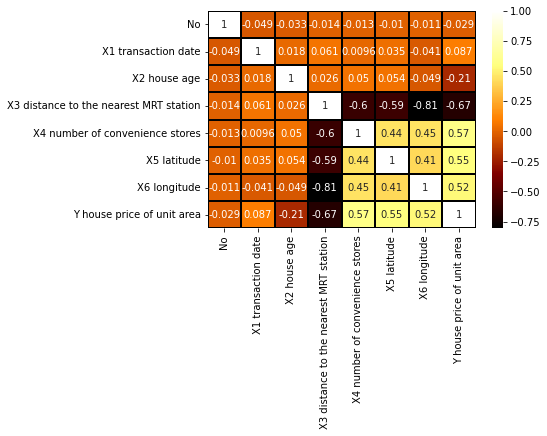

In [7]:
sns.heatmap(df.corr(),annot=True,linecolor='black',linewidths='0.4',cmap='afmhot')
plt.show()

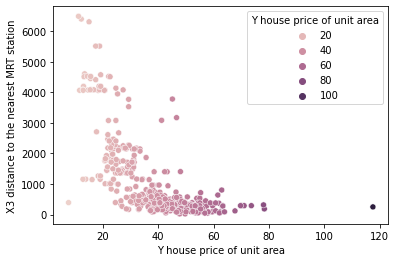

In [8]:
sns.scatterplot(x='Y house price of unit area',y='X3 distance to the nearest MRT station',
                hue='Y house price of unit area',
                data=df)
plt.show()

<AxesSubplot:xlabel='X1 transaction date', ylabel='Y house price of unit area'>

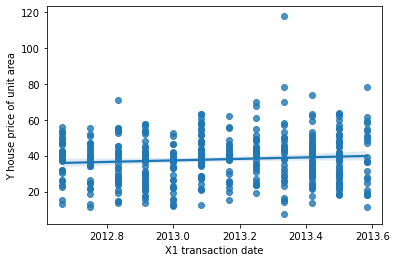

In [9]:
sns.regplot(x = "X1 transaction date" ,y = "Y house price of unit area",data = df)

<AxesSubplot:xlabel='X2 house age', ylabel='Y house price of unit area'>

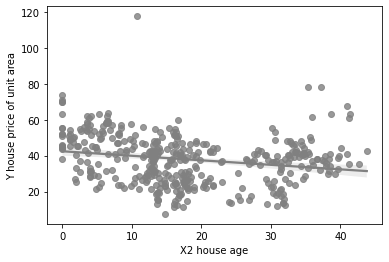

In [10]:
sns.regplot(x = "X2 house age" ,y = "Y house price of unit area",data = df,color='grey')

<AxesSubplot:xlabel='X3 distance to the nearest MRT station', ylabel='Y house price of unit area'>

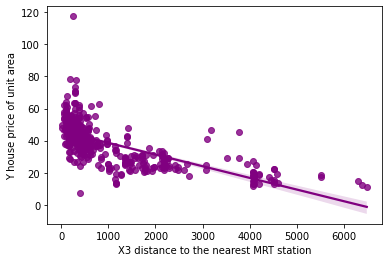

In [11]:
sns.regplot(x = "X3 distance to the nearest MRT station" ,y = "Y house price of unit area",data = df,color='purple')

<AxesSubplot:xlabel='X4 number of convenience stores', ylabel='Y house price of unit area'>

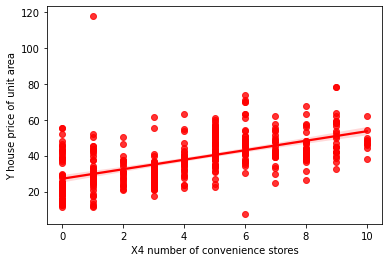

In [12]:
sns.regplot(x = "X4 number of convenience stores" ,y = "Y house price of unit area",data = df,color='red')

Text(0.5, 6.79999999999999, 'house price of unit area')

<Figure size 576x216 with 0 Axes>

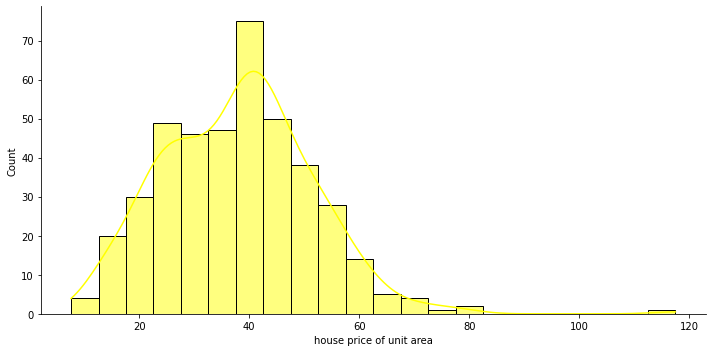

In [13]:
plt.figure(figsize=(8,3))
sns.displot(x=df['Y house price of unit area'], kde=True, aspect=2, color='yellow')
plt.xlabel('house price of unit area')

# Spliting the Variables:

In [14]:
X = df.iloc[:,:-1]
y = df.iloc[:,[-1]]

In [15]:
X.shape

(414, 7)

In [16]:
y.shape

(414, 1)

# Data Prepreocessing:

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
X=scaler.fit_transform(X)
y=scaler.fit_transform(y)

# Spliting the DataSet:

In [19]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

# Model:

# 1.Linear Regression:

In [20]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()

In [21]:
model1.fit(X_train,y_train)

LinearRegression()

In [22]:
pred1=model1.predict(X_test)

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE1= mean_absolute_error(y_test, pred1)
MSE1= mean_squared_error(y_test, pred1)
RMSE1= np.sqrt(MSE1)

In [25]:
print(f"Performance of Logistic Regression Model: \n\tMean Absolute Error:{MAE1} \n \tMean Square Error:{MSE1} \n \tRoot Mea Squared Error:{RMSE1}")

Performance of Logistic Regression Model: 
	Mean Absolute Error:0.4034338277675469 
 	Mean Square Error:0.29020028755698546 
 	Root Mea Squared Error:0.5387024109440995


# 2.Ridge:

In [26]:
from sklearn.linear_model import Ridge

model2=Ridge()

In [27]:
model2.fit(X_train,y_train)

Ridge()

In [28]:
prediction2=model2.predict(X_test)

In [29]:
MAE2= mean_absolute_error(y_test, prediction2)
MSE2= mean_squared_error(y_test, prediction2)
RMSE2= np.sqrt(MSE2)

In [30]:
print(f"Performance of  RIDGE : \n\tMean Absolute Error:{MAE2} \n \tMean Square Error:{MSE2} \n \tRoot Mea Squared Error:{RMSE2}")

Performance of  RIDGE : 
	Mean Absolute Error:0.404009287719303 
 	Mean Square Error:0.29050648503865595 
 	Root Mea Squared Error:0.5389865351181381
